> # **Handling Complex Images**


## 1) Installing Dependencies


In [1]:
!pip install tensorflow --quiet

## 2) Importing Libraries


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

## 3) Loading Images


Sample happy image:


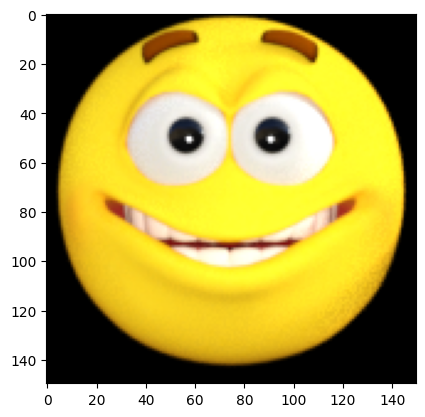


Sample sad image:


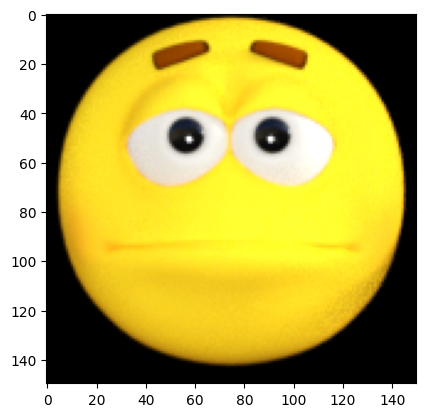

In [5]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

## 4) Logging Details


In [6]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


## 5) Defining Callback


In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") is not None and logs.get("accuracy") > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

## 6) Preprocessing the Data


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def image_generator():
    train_datagen = ImageDataGenerator(rescale=1 / 255)

    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(
        directory="./data", target_size=(150, 150), batch_size=10, class_mode="binary"
    )

    return train_generator

## 7) Calling the Image Generator


In [10]:
gen = image_generator()

Found 80 images belonging to 3 classes.


## 8) Creating the Model


In [15]:
from tensorflow.keras import optimizers, losses


def train_happy_sad_model(train_generator):
    callbacks = myCallback()

    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(
                32, (3, 3), activation="relu", input_shape=(150, 150, 3)
            ),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(512, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )

    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x=train_generator, epochs=15, callbacks=[callbacks])

    return (history, model)

## 9) Training the Model


In [16]:
(hist, model) = train_happy_sad_model(gen)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 679ms/step - accuracy: 0.3132 - loss: 0.7642
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 738ms/step - accuracy: 0.5513 - loss: 0.4487
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 548ms/step - accuracy: 0.4394 - loss: 0.5606
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 801ms/step - accuracy: 0.4707 - loss: 0.5293
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step - accuracy: 0.4847 - loss: 0.5153
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 782ms/step - accuracy: 0.5157 - loss: 0.4843
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - accuracy: 0.5148 - loss: 0.4852
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step - accuracy: 0.4821 - loss: 0.5179
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step - accuracy: 0.5547 - loss: 0.4453
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 605ms/step - accuracy: 0.5787 - loss: 0.4213
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step - accuracy: 0.5040 - loss: 0.4960
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 754ms/step - accuracy: 0.5114 - loss: 0.488

## 10) Model Summary


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,854,533 (29.96 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,236,356 (19.98 MB)